In [84]:
import csv
import numpy as np
import statistics as st
import matplotlib.pyplot as plt                                #importing matplotlib for plotting graphs
from matplotlib import style
style.use("ggplot")
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [37]:
data = []
def read_csv_file(filename):
    f = open(filename)
    for row in csv.reader(f):
        data.append(row)
    print(data)
    f.close()

In [38]:
read_csv_file("C:/Users/nachiket/Desktop/attendance research correlation/ait.csv")

[['73', '17'], ['73', '17'], ['80', '18'], ['87', '13'], ['73', '12'], ['67', '9'], ['80', '10'], ['100', '20'], ['80', '17'], ['80', '14'], ['87', '17'], ['53', '11'], ['93', '16'], ['27', '9'], ['93', '17'], ['73', '9'], ['100', '17'], ['93', '14'], ['87', '10'], ['93', '17'], ['93', '13'], ['100', '19'], ['87', '13'], ['93', '13'], ['60', '0'], ['67', '11'], ['67', '16'], ['100', '16'], ['60', '16'], ['93', '14'], ['100', '18'], ['87', '16'], ['73', '11'], ['100', '17'], ['27', '0'], ['93', '19'], ['80', '8'], ['100', '15'], ['67', '11'], ['87', '18'], ['100', '17'], ['87', '15'], ['73', '9'], ['60', '14'], ['100', '18'], ['73', '12'], ['93', '17'], ['80', '14'], ['80', '14'], ['87', '16'], ['73', '18'], ['100', '15'], ['53', '13'], ['73', '17'], ['73', '12'], ['67', '16'], ['100', '20'], ['53', '12'], ['73', '15'], ['53', '8'], ['87', '19'], ['73', '16'], ['87', '19'], ['100', '18'], ['7', '0'], ['100', '19'], ['87', '16'], ['100', '19'], ['73', '20'], ['87', '11'], ['87', '14'], [

In [39]:
print(data)
print(len(data))


[['73', '17'], ['73', '17'], ['80', '18'], ['87', '13'], ['73', '12'], ['67', '9'], ['80', '10'], ['100', '20'], ['80', '17'], ['80', '14'], ['87', '17'], ['53', '11'], ['93', '16'], ['27', '9'], ['93', '17'], ['73', '9'], ['100', '17'], ['93', '14'], ['87', '10'], ['93', '17'], ['93', '13'], ['100', '19'], ['87', '13'], ['93', '13'], ['60', '0'], ['67', '11'], ['67', '16'], ['100', '16'], ['60', '16'], ['93', '14'], ['100', '18'], ['87', '16'], ['73', '11'], ['100', '17'], ['27', '0'], ['93', '19'], ['80', '8'], ['100', '15'], ['67', '11'], ['87', '18'], ['100', '17'], ['87', '15'], ['73', '9'], ['60', '14'], ['100', '18'], ['73', '12'], ['93', '17'], ['80', '14'], ['80', '14'], ['87', '16'], ['73', '18'], ['100', '15'], ['53', '13'], ['73', '17'], ['73', '12'], ['67', '16'], ['100', '20'], ['53', '12'], ['73', '15'], ['53', '8'], ['87', '19'], ['73', '16'], ['87', '19'], ['100', '18'], ['7', '0'], ['100', '19'], ['87', '16'], ['100', '19'], ['73', '20'], ['87', '11'], ['87', '14'], [

In [70]:
#make separate lists for attendance and marks
x = []
y = []
def make_separate_lists(data):
    for row in range(len(data)):
        x.append(float(data[row][0]))
        y.append(float(data[row][1]))
    print(x)
    print(y)

    
make_separate_lists(data)
print(len(x))
print(len(y))

[73.0, 73.0, 80.0, 87.0, 73.0, 67.0, 80.0, 100.0, 80.0, 80.0, 87.0, 53.0, 93.0, 27.0, 93.0, 73.0, 100.0, 93.0, 87.0, 93.0, 93.0, 100.0, 87.0, 93.0, 60.0, 67.0, 67.0, 100.0, 60.0, 93.0, 100.0, 87.0, 73.0, 100.0, 27.0, 93.0, 80.0, 100.0, 67.0, 87.0, 100.0, 87.0, 73.0, 60.0, 100.0, 73.0, 93.0, 80.0, 80.0, 87.0, 73.0, 100.0, 53.0, 73.0, 73.0, 67.0, 100.0, 53.0, 73.0, 53.0, 87.0, 73.0, 87.0, 100.0, 7.0, 100.0, 87.0, 100.0, 73.0, 87.0, 87.0, 67.0, 60.0, 80.0, 60.0, 87.0, 80.0]
[17.0, 17.0, 18.0, 13.0, 12.0, 9.0, 10.0, 20.0, 17.0, 14.0, 17.0, 11.0, 16.0, 9.0, 17.0, 9.0, 17.0, 14.0, 10.0, 17.0, 13.0, 19.0, 13.0, 13.0, 0.0, 11.0, 16.0, 16.0, 16.0, 14.0, 18.0, 16.0, 11.0, 17.0, 0.0, 19.0, 8.0, 15.0, 11.0, 18.0, 17.0, 15.0, 9.0, 14.0, 18.0, 12.0, 17.0, 14.0, 14.0, 16.0, 18.0, 15.0, 13.0, 17.0, 12.0, 16.0, 20.0, 12.0, 15.0, 8.0, 19.0, 16.0, 19.0, 18.0, 0.0, 19.0, 16.0, 19.0, 20.0, 11.0, 14.0, 9.0, 11.0, 19.0, 17.0, 15.0, 13.0]
77
77


In [79]:
#normalization new_element = (element-mean)/range(max-min)
p = []
q = []
def normalization(x,y):
    xbar = st.mean(x)
    sx = max(x)-min(x)
    ybar = st.mean(y)
    sy = max(y)-min(y)
    for i in range(len(x)):
        data[i][0] = (x[i] - xbar)/sx
        data[i][1] = (y[i] - ybar)/sy
    print(data)
    #print(p)
    #print("\n")
    #print(q)

normalization(x,y) 

[[-0.06675045384722807, 0.13896103896103895], [-0.06675045384722807, 0.13896103896103895], [0.008518363357073015, 0.18896103896103894], [0.08378718056137409, -0.061038961038961045], [-0.06675045384722807, -0.11103896103896105], [-0.13126658287948612, -0.26103896103896107], [0.008518363357073015, -0.21103896103896105], [0.22357212679793323, 0.288961038961039], [0.008518363357073015, 0.13896103896103895], [0.008518363357073015, -0.011038961038961048], [0.08378718056137409, 0.13896103896103895], [-0.2818042172880883, -0.16103896103896104], [0.14830330959363217, 0.08896103896103895], [-0.5613741097612066, -0.26103896103896107], [0.14830330959363217, 0.13896103896103895], [-0.06675045384722807, -0.26103896103896107], [0.22357212679793323, 0.13896103896103895], [0.14830330959363217, -0.011038961038961048], [0.08378718056137409, -0.21103896103896105], [0.14830330959363217, 0.13896103896103895], [0.14830330959363217, -0.061038961038961045], [0.22357212679793323, 0.23896103896103896], [0.083787

In [80]:
X = np.array(data)
print(X)

[[-0.06675045  0.13896104]
 [-0.06675045  0.13896104]
 [ 0.00851836  0.18896104]
 [ 0.08378718 -0.06103896]
 [-0.06675045 -0.11103896]
 [-0.13126658 -0.26103896]
 [ 0.00851836 -0.21103896]
 [ 0.22357213  0.28896104]
 [ 0.00851836  0.13896104]
 [ 0.00851836 -0.01103896]
 [ 0.08378718  0.13896104]
 [-0.28180422 -0.16103896]
 [ 0.14830331  0.08896104]
 [-0.56137411 -0.26103896]
 [ 0.14830331  0.13896104]
 [-0.06675045 -0.26103896]
 [ 0.22357213  0.13896104]
 [ 0.14830331 -0.01103896]
 [ 0.08378718 -0.21103896]
 [ 0.14830331  0.13896104]
 [ 0.14830331 -0.06103896]
 [ 0.22357213  0.23896104]
 [ 0.08378718 -0.06103896]
 [ 0.14830331 -0.06103896]
 [-0.2065354  -0.71103896]
 [-0.13126658 -0.16103896]
 [-0.13126658  0.08896104]
 [ 0.22357213  0.08896104]
 [-0.2065354   0.08896104]
 [ 0.14830331 -0.01103896]
 [ 0.22357213  0.18896104]
 [ 0.08378718  0.08896104]
 [-0.06675045 -0.16103896]
 [ 0.22357213  0.13896104]
 [-0.56137411 -0.71103896]
 [ 0.14830331  0.23896104]
 [ 0.00851836 -0.31103896]
 

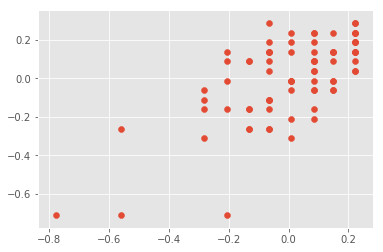

In [81]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [89]:
km = KMeans(n_clusters=4)
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
centroids = km.cluster_centers_
labels = km.labels_
print(centroids)
print(labels)

[[ 0.15629102  0.1161039 ]
 [-0.10330959 -0.18103896]
 [-0.52642787 -0.59853896]
 [-0.0721268   0.10840548]]
[3 3 3 0 1 1 1 0 3 3 0 1 0 2 0 1 0 0 1 0 0 0 0 0 2 1 3 0 3 0 0 0 1 0 2 0 1
 0 1 0 0 0 1 3 0 1 0 3 3 0 3 0 1 3 1 3 0 1 3 1 0 3 0 0 2 0 0 0 3 1 0 1 1 3
 3 0 1]


coordinate: [-0.06675045  0.13896104] label: 3
coordinate: [-0.06675045  0.13896104] label: 3
coordinate: [ 0.00851836  0.18896104] label: 3
coordinate: [ 0.08378718 -0.06103896] label: 0
coordinate: [-0.06675045 -0.11103896] label: 1
coordinate: [-0.13126658 -0.26103896] label: 1
coordinate: [ 0.00851836 -0.21103896] label: 1
coordinate: [ 0.22357213  0.28896104] label: 0
coordinate: [ 0.00851836  0.13896104] label: 3
coordinate: [ 0.00851836 -0.01103896] label: 3
coordinate: [ 0.08378718  0.13896104] label: 0
coordinate: [-0.28180422 -0.16103896] label: 1
coordinate: [ 0.14830331  0.08896104] label: 0
coordinate: [-0.56137411 -0.26103896] label: 2
coordinate: [ 0.14830331  0.13896104] label: 0
coordinate: [-0.06675045 -0.26103896] label: 1
coordinate: [ 0.22357213  0.13896104] label: 0
coordinate: [ 0.14830331 -0.01103896] label: 0
coordinate: [ 0.08378718 -0.21103896] label: 1
coordinate: [ 0.14830331  0.13896104] label: 0
coordinate: [ 0.14830331 -0.06103896] label: 0
coordinate: [

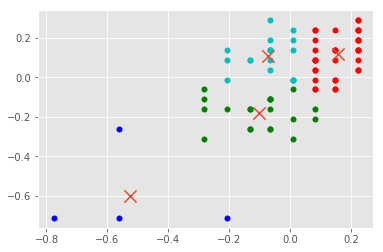

In [91]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(X)):
    print("coordinate:",X[i],"label:",labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 150, linewidths = 5, zorder = 10)
plt.show()